# Regresión Lineal
***

De clic __[en este enlace](https://www.youtube.com/watch?v=QQP_-4Z_2oY)__ para ver el video.

## Lo que se queiere hacer:  

De un conjunto de puntos $\{y,x\}$ se quiere encontrar una ecuación de la

$$ y=mx+b $$

tal que los datos se ajusten a una recta.

## Minimos Cuadrados:


**Error de minimo cuadrado:**

$$ MSE = R^2= \frac{1}{N} \sum^{N}_{i} (y_i - (m x_i + b))^2 $$


Se quiere minimizar tal que

$$\frac{\partial (R^2)}{\partial m} = 0$$ <br>  $$ \frac{\partial (R^2)}{\partial b} = 0 $$ 


Produce las siguientes ecuaciones para **m** y para **b** : 

$$ m = \frac{N \sum_i x_i y_i  - \sum_i x_i \sum_i y_i}{N\sum_i x^2_i  - (\sum_i x_i)^2} $$

y

$$ b = \frac{\sum_i y_i - m \sum_i x_i}{N}  = \bar{y} - m \bar{x} $$



## Proposito: 

Utilizar las librerias de Python para obtener una aproximación lineal a un conjunto de datos. 

***
### Primer Ejemplo

***

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Libreria que tiene implementada la regresion lineal
from sklear.linear_model import LinearRegression

In [8]:
# Generar el conjunto de datos
import random

def lista_aleatorios(N):
    x=[0]*N
    for i in range(N):
        x[i]=random.randint(0,51)
    return x
y = lista_aleatorios(10)

In [9]:
print(y)

[47, 35, 43, 15, 19, 30, 3, 34, 42, 49]


In [10]:
x = np.array([1,5,8,15,17,25,32,42,56,57])
x

array([ 1,  5,  8, 15, 17, 25, 32, 42, 56, 57])

In [11]:
y = np.array(y)

In [17]:
# Instanciar el modelo

linearmodel = LinearRegression()

In [15]:
# Arreglar los datos
x = x.reshape(-1,1)
x

array([[ 1],
       [ 5],
       [ 8],
       [15],
       [17],
       [25],
       [32],
       [42],
       [56],
       [57]])

In [18]:
# Hacer la regresión 
linearmodel.fit(x,y)

LinearRegression()

In [20]:
#Prediccion
y_recta = linearmodel.predict(x)

In [21]:
y_recta

array([29.35348142, 29.73195216, 30.01580521, 30.678129  , 30.86736437,
       31.62430585, 32.28662965, 33.23280649, 34.55745408, 34.65207176])

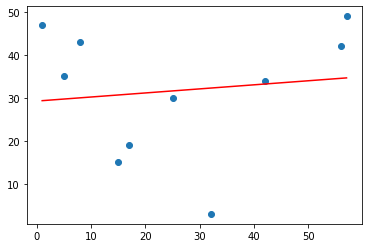

In [23]:
# Figura para ver el resultado
plt.scatter(x,y)
plt.plot(x,y_recta, color = 'red')
plt.show()

In [26]:
# Parametros del ajuste
m = linearmodel.coef_
c = linearmodel.intercept_
print("La recta que mejor se ajusta es y={:.3f}x+{:.3f}".format(m[0],c))

La recta que mejor se ajusta es y=0.095x+29.259


In [27]:
# Plot del ajuste

y_ajuste = m[0]*x+c

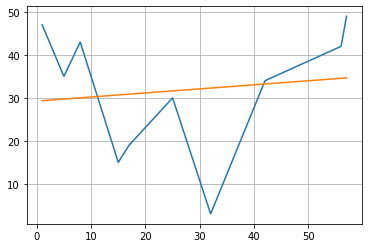

In [29]:
plt.grid(True)
plt.plot(x,y)
plt.plot(x,y_ajuste)
plt.show()

### Segundo Ejemplo

In [30]:
x = np.array([i for i in range(0,6)])
y = np.array([0,0.2,0.8,1.2,1.5,1.9])
print(x,y)

[0 1 2 3 4 5] [0.  0.2 0.8 1.2 1.5 1.9]


In [31]:
from scipy.interpolate import *

In [32]:
#Ajuste

orden_poly = 1

p1 = np.polyfit(x,y,orden_poly)
print(p1)

[ 0.39428571 -0.05238095]


In [33]:
x_p = np.linspace(0,6,100)
y_p = p1[0]*x_p+p1[1]

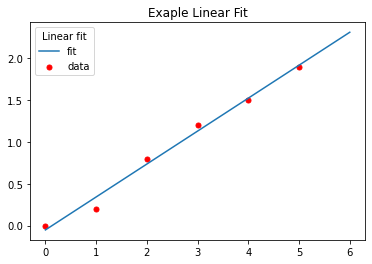

In [34]:
plt.title("Exaple Linear Fit")
plt.scatter(x,y, s=25,c='red',label='data')
plt.plot(x_p,y_p,label='fit')
plt.legend()
plt.legend(loc=2,frameon=True,title='Linear fit')
plt.show()

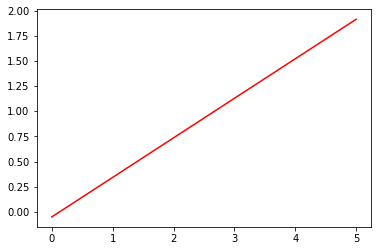

In [35]:
plt.plot(x,np.polyval(p1,x),'r-')
plt.show()

###  Error R2

### Sklear Metrics

In [36]:
from sklearn.metrics import r2_score
x_p = x
y_p = p1[0]*x_p+p1[1]
r2_score(y, y_p)

0.9881010031131097

### Analítico

In [37]:
residual = sum(pow(y-y_p,2))
sum_square_total = len(y)*np.var(y)
residual_square = 1 - residual/sum_square_total

In [38]:
residual_square

0.9881010031131097